In [52]:
#wine data
import pandas as pd
import sklearn
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
wdata=pd.read_csv('winedataset.csv')

In [4]:
wdata

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


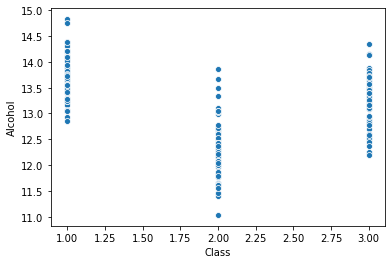

In [5]:
sbn.scatterplot(wdata['Class'],wdata['Alcohol'])
plt.show()

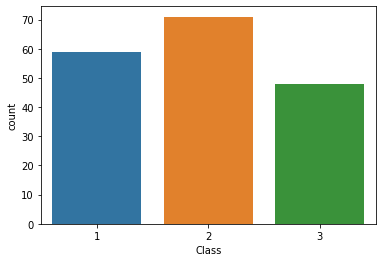

In [6]:
sbn.countplot(wdata['Class'])

In [7]:
wdata['Alcohol'].unique()

array([14.23, 13.2 , 13.16, 14.37, 13.24, 14.2 , 14.39, 14.06, 14.83,
       13.86, 14.1 , 14.12, 13.75, 14.75, 14.38, 13.63, 14.3 , 13.83,
       14.19, 13.64, 12.93, 13.71, 12.85, 13.5 , 13.05, 13.39, 13.3 ,
       13.87, 14.02, 13.73, 13.58, 13.68, 13.76, 13.51, 13.48, 13.28,
       13.07, 14.22, 13.56, 13.41, 13.88, 14.21, 13.9 , 13.94, 13.82,
       13.77, 13.74, 13.29, 13.72, 12.37, 12.33, 12.64, 13.67, 12.17,
       13.11, 13.34, 12.21, 12.29, 13.49, 12.99, 11.96, 11.66, 13.03,
       11.84, 12.7 , 12.  , 12.72, 12.08, 12.67, 12.16, 11.65, 11.64,
       12.69, 11.62, 12.47, 11.81, 12.6 , 12.34, 11.82, 12.51, 12.42,
       12.25, 12.22, 11.61, 11.46, 12.52, 11.76, 11.41, 11.03, 12.77,
       11.45, 11.56, 11.87, 12.07, 12.43, 11.79, 12.04, 12.86, 12.88,
       12.81, 12.53, 12.84, 13.36, 13.52, 13.62, 12.87, 13.32, 13.08,
       12.79, 13.23, 12.58, 13.17, 13.84, 12.45, 14.34, 12.36, 13.69,
       12.96, 13.78, 13.45, 12.82, 13.4 , 12.2 , 14.16, 13.27, 14.13])

In [8]:
wdata['Class'].unique()

array([1, 2, 3], dtype=int64)

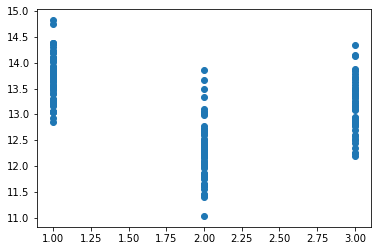

In [9]:
plt.scatter(wdata['Class'],wdata['Alcohol'])
plt.show()

In [10]:
wdata.corr()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


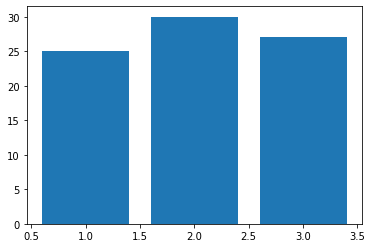

In [11]:
plt.bar(wdata['Class'],wdata['Alcalinity of ash'])
plt.show()

In [12]:
wdata['Alcalinity of ash'].unique()

array([15.6, 11.2, 18.6, 16.8, 21. , 15.2, 14.6, 17.6, 14. , 16. , 18. ,
       11.4, 12. , 17.2, 20. , 16.5, 16.6, 17.8, 25. , 16.1, 17. , 19.4,
       22.5, 19.1, 19.5, 19. , 20.5, 15.5, 13.2, 16.2, 18.8, 15. , 17.5,
       18.9, 17.4, 12.4, 17.1, 16.4, 16.3, 16.7, 10.6, 18.1, 19.6, 20.4,
       24. , 30. , 14.8, 23. , 22.8, 26. , 21.6, 23.6, 18.5, 22. , 20.7,
       21.5, 20.8, 28.5, 26.5, 24.5, 23.5, 25.5, 27. ])

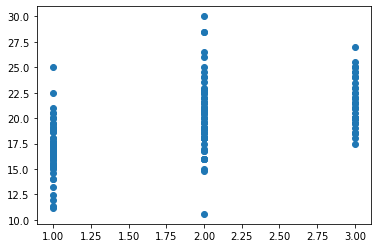

In [13]:
plt.scatter(wdata['Class'],wdata['Alcalinity of ash'])


In [14]:
from scipy.stats import zscore
zsc=zscore(wdata)

In [15]:
np.where(zsc>3)

(array([ 25,  69,  73,  95, 110, 115, 121, 121, 123, 158], dtype=int64),
 array([ 3,  5,  4,  5,  9, 11,  3,  7,  2, 10], dtype=int64))

In [16]:
zsc

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [17]:
zsc[25][3]

3.1197718608780005

In [18]:
wdatan=wdata[(zsc<3).all(axis=1)]

In [19]:
wdata.shape

(178, 14)

In [20]:
wdatan.shape

(169, 14)

In [21]:
wdatan.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [25]:
y=pd.DataFrame(wdatan['Class'])

In [26]:
y.shape

(169, 1)

In [27]:
type(y)

pandas.core.frame.DataFrame

In [29]:
wdatan.shape

(169, 14)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002630110C7C8>,
      dtype=object)

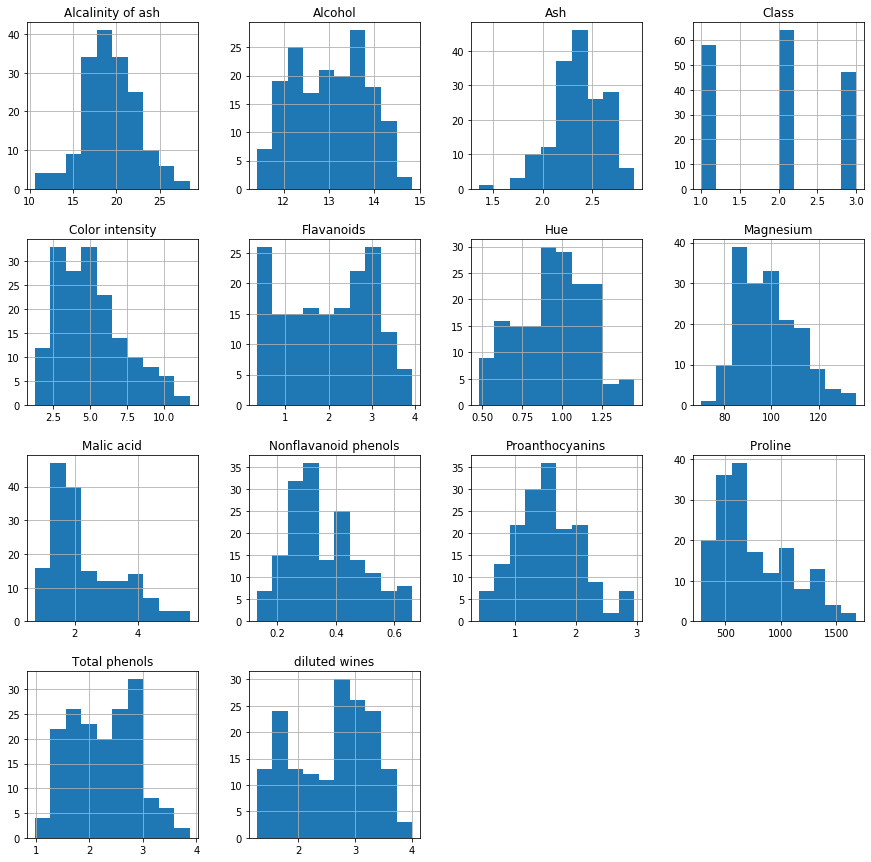

In [33]:
wdatan.hist(figsize=(15,15))

In [34]:
x_train,x_test,y_train,y_test=train_test_split(wdatan,y,test_size=.22,random_state=43)

In [39]:
import warnings
warnings.filterwarnings('ignore')
lr=LogisticRegression()
cvs=cross_val_score(lr,x_train,y_train,cv=5,scoring='accuracy')
print(cvs)
print(cvs.mean())

[0.96296296 0.96296296 1.         0.96153846 0.91666667]
0.9608262108262109


In [53]:
dt=DecisionTreeClassifier()
cvs=cross_val_score(dt,x_train,y_train,cv=5,scoring='accuracy')
print(cvs.mean())

1.0


In [54]:
sv=SVC()
cvs=cross_val_score(sv,x_train,y_train,cv=5,scoring='accuracy')
print(cvs.mean())

0.4432336182336183


In [56]:
kn=KNeighborsClassifier()
cvs=cross_val_score(kn,x_train,y_train,cv=5,scoring='accuracy')
print(cvs.mean())

0.672079772079772


In [59]:
#fitting the model

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddtc=dt.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

1.0
[[19  0  0]
 [ 0 10  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [60]:
preddtc


array([1, 1, 2, 3, 1, 1, 3, 1, 3, 2, 1, 1, 2, 3, 1, 2, 2, 2, 3, 2, 2, 3,
       1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 2], dtype=int64)

In [61]:
y_test

,Class
2,1
0,1
124,2
157,3
56,1
42,1
152,3
11,1
148,3
71,2
